# Pytorch深度神经网络及训练

**Daitu：2505131775@qq.com**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 3.2 Pytorch中的优化器

介绍优化器的常用使用方法

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [3]:
## 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        ## 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13,10),
            nn.ReLU(),
        )
        ## 定义预测回归层
        self.regression = nn.Linear(10,1)
    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        ## 输出为output
        return output
        
## 输出我们的网络结构
testnet = TestNet()
print(testnet)

TestNet(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [4]:
## 使用方式1
optimizer = Adam(testnet.parameters(),lr=0.001)  

In [5]:
## 使用方式2：为不同的层定义不同的学习率
optimizer = Adam(
    [{"params":testnet.hidden.parameters(),"lr":0.0001},
    {"params":testnet.regression.parameters(),"lr": 0.01}],
    lr=1e-2)

## 这意味着testnet.hidden的参数将会使用0.0001的学习率，
## testnet.regression的参数将会使用0.01的学习率，
## 而且lr=1e-2将作用于其它没有特殊指定的所有参数。

In [6]:
# ## 注意该段程序并不能运行成功，作为示例使用
# ## 对目标函数进行优化时通常的格式
# for input, target in dataset:
#     optimizer.zero_grad()        ## 梯度清零
#     output = testnetst(input)    ## 计算预测值
#     loss = loss_fn(output, target)## 计算损失
#     loss.backward()               ## 损失后向传播
#     optimizer.step()              # 更新网络参数

## 3.5 参数初始化方法

**针对一个层的权重初始化方法**

**针对一个网络的权重初始化方法**

In [7]:
## 针对一个层的权重初始化方法
conv1 = torch.nn.Conv2d(3,16,3)
## 使用标准正态分布分布初始化权重
torch.manual_seed(12)  ## 随机数初始化种子
torch.nn.init.normal(conv1.weight,mean=0,std=1)

C:\Users\edgar\AppData\Local\Temp\ipykernel_3096\2447194885.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(conv1.weight,mean=0,std=1)


Parameter containing:
tensor([[[[-1.3201e-01, -1.2544e-01,  3.4431e-01],
          [-4.5191e-01, -8.8876e-01, -3.5265e-01],
          [-1.3373e+00,  5.2231e-01, -1.1118e+00]],

         [[-7.1707e-01,  1.0426e+00, -1.2510e+00],
          [-5.1067e-01, -3.8429e-01, -4.8987e-01],
          [ 5.3057e-01, -4.9287e-01, -2.6253e-01]],

         [[-1.6102e-01, -8.3718e-01, -1.2945e+00],
          [-2.6232e-01, -5.3525e-01,  1.3466e+00],
          [-2.7361e+00,  1.9106e+00,  4.9242e-01]]],


        [[[-6.9206e-01, -6.9444e-01, -2.1245e-01],
          [ 2.3618e-01, -1.2438e+00, -1.2427e-01],
          [ 3.9906e-01, -3.5954e-01,  4.5832e-01]],

         [[-1.0828e+00, -6.0059e-01,  5.5490e-02],
          [ 7.0821e-01, -8.7218e-01,  6.6645e-01],
          [ 6.8104e-01,  4.5224e-01, -9.4021e-01]],

         [[ 1.8076e-01, -5.5380e-01,  1.5044e+00],
          [ 5.9933e-01,  2.2986e+00, -8.9508e-01],
          [-2.7441e+00,  9.8023e-01,  1.8197e+00]]],


        [[[ 1.4824e+00,  1.2561e-02,  6.7311

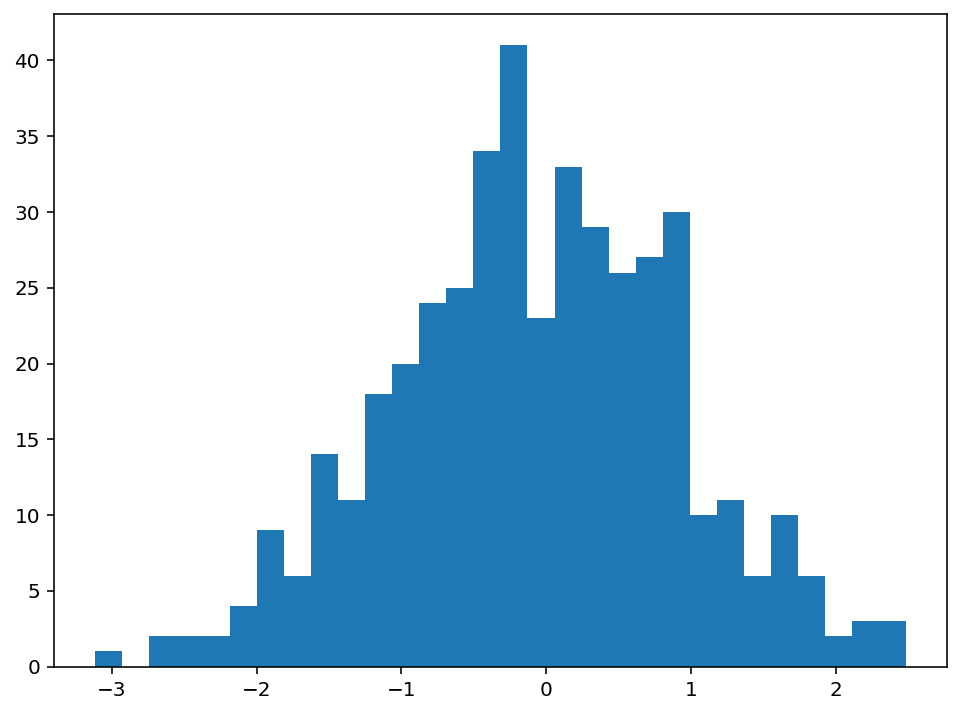

In [8]:
## 使用直方图可视化conv1.weight的分布情况
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(conv1.weight.data.numpy().reshape((-1,1)),bins = 30)
plt.show()

In [9]:
## 使用指定值初始化偏置
torch.nn.init.constant(conv1.bias,val=0.1)

C:\Users\edgar\AppData\Local\Temp\ipykernel_3096\1729699341.py:2: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  torch.nn.init.constant(conv1.bias,val=0.1)


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

####  针对一个网络的权重初始化方法

定义一个TestNet()网络类为例

In [10]:
## 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)
        self.hidden = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
        )
        self.cla = nn.Linear(50,10)
    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.shape[0],-1)
        x = self.hidden(x)
        output = self.cla(x)
        return output
        
## 输出我们的网络结构
testnet = TestNet()
print(testnet)


TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)


In [11]:
## 定义为网络中的没个层进行权重初始化的函数
def init_weights(m):
    ## 如果是卷积层
    if type(m) == nn.Conv2d:
        torch.nn.init.normal(m.weight,mean=0,std=0.5)
    ## 如果是全连接层
    if type(m) == nn.Linear:
        torch.nn.init.uniform(m.weight,a=-0.1,b=0.1)
        m.bias.data.fill_(0.01)
        

## 使用网络的apply方法进行权重初始化
torch.manual_seed(13)  ## 随机数初始化种子
testnet.apply(init_weights)
testnet.cla.weight.data

C:\Users\edgar\AppData\Local\Temp\ipykernel_3096\2642572792.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(m.weight,mean=0,std=0.5)
C:\Users\edgar\AppData\Local\Temp\ipykernel_3096\2642572792.py:8: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  torch.nn.init.uniform(m.weight,a=-0.1,b=0.1)


tensor([[-8.1426e-02, -8.6253e-02,  7.1077e-02,  4.0488e-02,  9.2366e-02,
          7.0249e-02, -4.4473e-02, -8.0497e-02, -8.0821e-02,  1.0651e-02,
          9.6692e-02, -4.2943e-02, -3.7903e-02,  2.9388e-02,  3.5153e-02,
          8.5084e-02, -2.7165e-02, -7.8487e-02, -8.7527e-02, -2.8606e-02,
         -9.3839e-02, -9.6745e-02,  2.1198e-03,  6.5725e-02,  2.1067e-02,
         -7.8905e-02,  2.3045e-02, -3.1271e-02,  4.7324e-02,  8.4716e-02,
          1.8341e-02, -1.0031e-02,  1.9340e-02,  7.6852e-02,  4.8772e-02,
          4.6029e-03, -9.9761e-02,  4.8784e-02,  8.0059e-02,  5.3519e-02,
         -7.5982e-02, -7.4513e-02,  4.6608e-02, -6.0962e-02,  9.1081e-02,
         -5.2580e-02, -6.4547e-02,  6.4691e-02, -3.7616e-02,  6.6632e-02],
        [ 7.2539e-02,  4.4024e-02, -5.8722e-02, -4.7674e-03, -1.3742e-02,
         -2.8310e-02, -7.6522e-02,  7.3045e-02,  5.5755e-02, -3.6266e-02,
         -1.5133e-02,  7.6951e-03, -1.6839e-03,  1.8865e-02,  1.6769e-02,
         -2.1692e-02, -4.4572e-02,  8

## 3.6 Pytorch中定义网络的方式


### 数据准备

In [12]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.utils.data as Data
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
## 读取数据
boston_X,boston_y = load_boston(return_X_y=True)
print("boston_X.shape:",boston_X.shape)

boston_X.shape: (506, 13)


c:\software\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

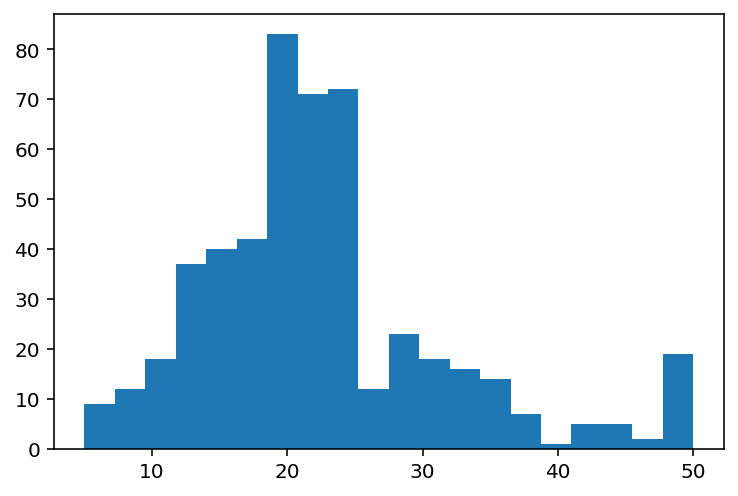

In [14]:
plt.figure()
plt.hist(boston_y,bins=20)
plt.show()

In [15]:
## 数据标准化处理
ss = StandardScaler(with_mean=True,with_std=True)
boston_Xs = ss.fit_transform(boston_X)
# boston_ys = ss.fit_transform(boston_y)
np.mean(boston_Xs,axis=0)
np.std(boston_Xs,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
## 将数据预处理为可以使用pytorch进行批量训练的形式
## 训练集X转化为张量
train_xt = torch.from_numpy(boston_Xs.astype(np.float32))
## 训练集y转化为张量
train_yt = torch.from_numpy(boston_y.astype(np.float32))
## 将训练集转化为张量后,使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size=128, # 批处理样本大小
    shuffle = True, # 每次迭代前打乱数据
    num_workers = 1, # 使用两个进程 
)

# ##  检查训练数据集的一个batch的样本的维度是否正确
# for step, (b_x, b_y) in enumerate(train_loader):  
#     if step > 0:
#         break
# ## 输出训练图像的尺寸和标签的尺寸，都是torch格式的数据
# print(b_x.shape)
# print(b_y.shape)

### 使用继承Module

In [17]:
## 使用继承Module的形式定义全连接神经网络
class MLPmodel(nn.Module):
    def __init__(self):
        super(MLPmodel,self).__init__()
        ## 定义第一个隐藏层
        self.hidden1 = nn.Linear(
            in_features = 13, ## 第一个隐藏层的输入，数据的特征数
            out_features = 10,## 第一个隐藏层的输出，神经元的数量
            bias=True, ## 默认会有偏置
        )
        self.active1 = nn.ReLU()
        ## 定义第一个隐藏层
        self.hidden2 = nn.Linear(10,10)
        self.active2 = nn.ReLU()
        ## 定义预测回归层
        self.regression = nn.Linear(10,1)

    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden1(x)
        x = self.active1(x)
        x = self.hidden2(x)
        x = self.active2(x)
        output = self.regression(x)
        ## 输出为output
        return output
        
## 输出我们的网络结构
mlp1 = MLPmodel()
print(mlp1)

MLPmodel(
  (hidden1): Linear(in_features=13, out_features=10, bias=True)
  (active1): ReLU()
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (active2): ReLU()
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [18]:
## 对回归模型mlp1进行训练并输出损失函数的变化情况
# 定义优化器和损失函数
optimizer = SGD(mlp1.parameters(),lr=0.001)  
loss_func = nn.MSELoss()  # 最小平方根误差
train_loss_all = [] ## 输出每个批次训练的损失函数
## 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    ## 对训练数据的迭代器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):  
        output = mlp1(b_x).flatten()      # MLP在训练batch上的输出
        train_loss = loss_func(output,b_y) # 平方根误差
        optimizer.zero_grad()           # 每个迭代步的梯度初始化为0
        train_loss.backward()           # 损失的后向传播，计算梯度
        optimizer.step()                # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

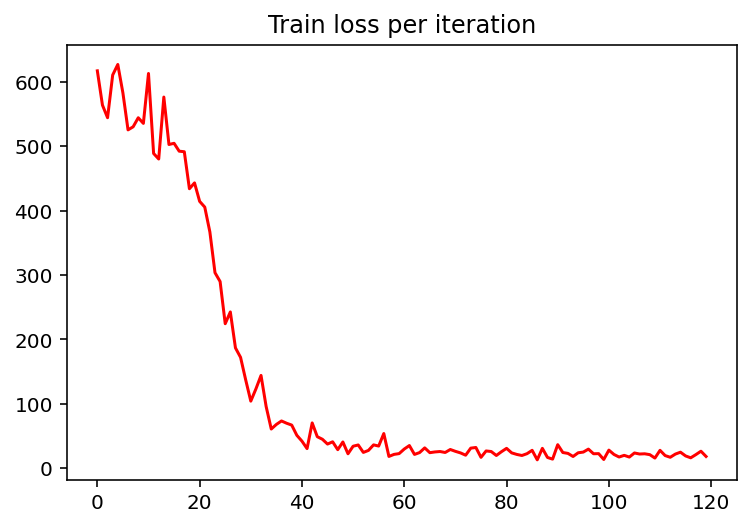

In [19]:
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

### 使用nn.Sequential

In [20]:
## 使用定义网络时使用nn.Sequential的形式
class MLPmodel2(nn.Module):
    def __init__(self):
        super(MLPmodel2,self).__init__()
        ## 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
        )
        ## 预测回归层
        self.regression = nn.Linear(10,1)

    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        return output
        
## 输出我们的网络结构
mlp2 = MLPmodel2()
print(mlp2)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [26]:
## 对回归模型mlp2进行训练并输出损失函数的变化情况
# 定义优化器和损失函数
optimizer = SGD(mlp2.parameters(),lr=0.001)  
loss_func = nn.MSELoss()  # 最小平方根误差
train_loss_all = [] ## 输出每个批次训练的损失函数
## 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    ## 对训练数据的迭代器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):  
        output = mlp2(b_x).flatten()               # MLP在训练batch上的输出
        train_loss = loss_func(output,b_y) # 平方根误差
        optimizer.zero_grad()           # 每个迭代步的梯度初始化为0
        train_loss.backward()           # 损失的后向传播，计算梯度
        optimizer.step()                # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

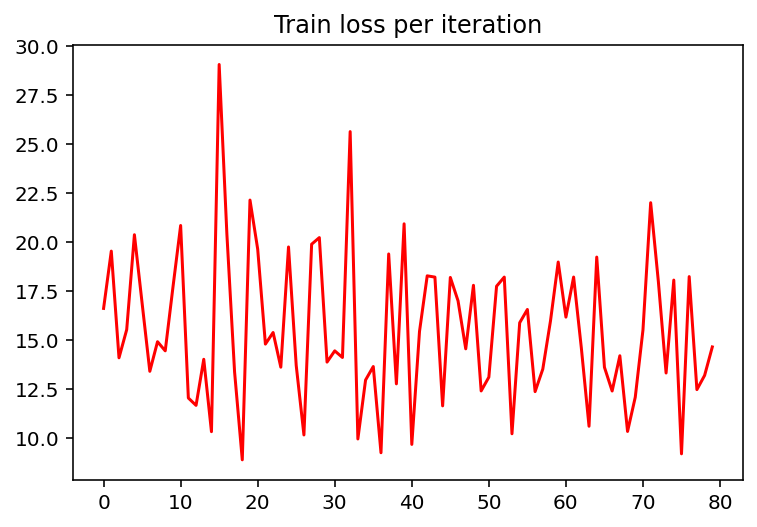

In [27]:
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

## Pytorch模型保存和加载方法

### 方法1:保存整个模型

In [23]:
## 保存整个模型
torch.save(mlp2,"data/chap3/mlp2.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'data/chap3/mlp2.pkl'

In [ ]:
## 导入保存的模型
mlp2load = torch.load("data/chap3/mlp2.pkl")
mlp2load

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)

### 方法2:只保存模型的参数

In [ ]:
torch.save(mlp2.state_dict(),"data/chap3/mlp2_param.pkl")

In [ ]:
## 导入保存的模型的参数
mlp2param = torch.load("data/chap3/mlp2_param.pkl")
mlp2param

OrderedDict([('hidden.0.weight',
              tensor([[-0.2822,  0.1334,  0.0388,  0.1440,  0.2618,  0.4390,  0.2546, -0.2445,
                       -0.0117,  0.2910, -0.1035, -0.0712, -0.2328],
                      [-0.2626,  0.2081,  0.1885, -0.1894, -0.1423, -0.0254,  0.1633, -0.0399,
                        0.1291, -0.1579, -0.3264, -0.2108,  0.2222],
                      [-0.0472, -0.2940,  0.3935,  0.3286, -0.3327, -0.1558, -0.0870, -0.0583,
                        0.1240,  0.0577,  0.0137,  0.0661, -0.4534],
                      [-0.2986, -0.2876,  0.0924, -0.1612,  0.0596,  0.0798,  0.0854, -0.0612,
                        0.1263,  0.1125,  0.2076, -0.1917, -0.1338],
                      [-0.0387, -0.2553, -0.2541,  0.1680,  0.1431, -0.0731,  0.0550, -0.0643,
                        0.2325, -0.2246, -0.0173,  0.0460,  0.0388],
                      [ 0.0909, -0.0387,  0.2761, -0.1015, -0.1025, -0.1738,  0.2652, -0.1256,
                       -0.0439, -0.0241,  0.1340, -0